# Synthetic data generation

## 1. Limonene production.

We will assume that the pathway dynamics is basically following Michaelis-Menten, while the concentration of the enzymes is modulated by the translational gains of the two RBS.

We will have first the transcriptional regulation, which will be assumed to be constitutive (always on):

$ \frac{d GPPS_m}{dt} = K_{m1} - K_{dm1} * GGPS_m $

$ \frac{d limS_m}{dt} = K_{m2} - K_{dm2} * limS_m $

followed by the translational regulation:

$ \frac{d GPPS}{dt} = K_{R1} * GGPS_m - K_{d1} * GPPS $

$ \frac{d limS}{dt} = K_{R2} * limS_m - K_{d2} * limS $

The parameters $K_{R1}$ and $K_{R2}$ are the ones that vary in the RBS library.


We write down the ODEs (ordinary differential equations) that calculate the derivatives:

In [2218]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

In [2219]:
def limonene_production_dynamics(y, t, rbs1_strength, rbs2_strength):
    """
    Simulates the limonene production model based on RBS strengths.
    
    Parameters:
    rbs1_strength (float): Strength of the first RBS.
    rbs2_strength (float): Strength of the second RBS.
    time (array): Time points for simulation.
    
    Returns:
    array: Limonene production values over time.
    """
    # Placeholder for the actual model implementation
    # This should include the ODEs and numerical integration logic

    gppsm, limsm, gpps, lims, gpp, lim = y  # Unpack the state variables

    ipp = 10  # Initial concentration of intermediate product, can be adjusted
    
    # Define parameters for the model
    Km1 = 0.1  # Transcription rate for first step
    Kdm1 = 0.01  # Degradation rate for first step
    Km2 = 0.1  # Transcription rate for second step
    Kdm2 = 0.01  # Degradation rate for second step
    Kr1 = rbs1_strength  # RBS strength for first gene
    Kd1 = 0.01  # Degradation rate for first gene product
    Kr2 = rbs2_strength  # RBS strength for second gene
    Kd2 = 0.01  # Degradation rate for second gene product
    
    Kcat = [0.01, 0.5]  # Catalytic constants for the reactions
    Km = [100, 1]  # Michaelis constants for the reactions
    Kd_gpp = 0.01  # Degradation rate for GPP
    Kd_lim = 0.01  # Degradation rate for limonene
    Kn1 = 1
    Kn2 = 1
    
    # Assuming a simple linear relationship for demonstration purposes  
    # In practice, this should be replaced with the actual ODE solution
    dgppsm = Km1 - Kdm1 * gppsm 
    dlimsm = Km2 - Kdm2 * limsm 
    dgpps = Kr1 * gppsm/(gppsm+Kn1) - Kd1 * gpps
    dlims = Kr2 * limsm/(limsm+Kn2) - Kd2 * lims  

    dgpp = Kcat[0] * gpps * ipp/(Km[0]+ipp) -  Kd_gpp * gpp
    dlim = Kcat[1] * lims * gpp/(Km[1]+gpp) -  Kd_lim * lim
    
    # Example: Limonene production is proportional to the product of RBS strengths
    # and time, simulating a simple growth model
    return [dgppsm, dlimsm, dgpps, dlims, dgpp, dlim]

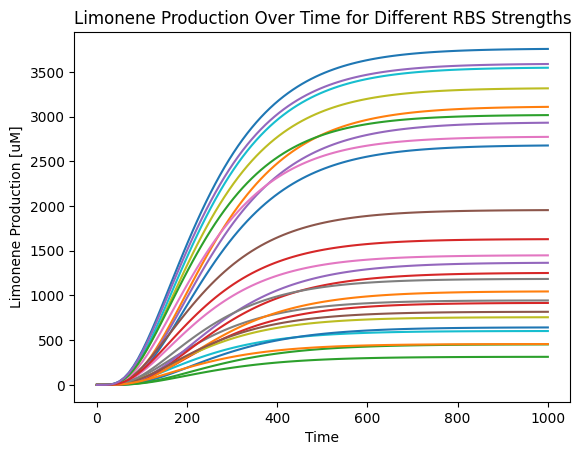

In [2220]:
y0 = [0, 0, 0, 0, 0, 0]  # Initial conditions for the system
time = np.linspace(0, 1000, 100)  # Time points for simulation

n = 5 # Number of RBS strengths to test
rbs = np.random.rand(n,2)  # Example RBS strengths for gene 1
X = [] # Placeholder for RBS strengths combinations
Y = [] # Placeholder for results

for rbs1_strength in np.random.rand(5): #[0.1, 0.5, 1.0]:  # Example RBS strengths for gene 1
    for rbs2_strength in np.random.rand(5): #[0.1, 0.5, 1.0]:  # Example RBS strengths for gene 2
        result = odeint(limonene_production_dynamics, y0, time, args=(rbs1_strength, rbs2_strength))
        X.append([rbs1_strength, rbs2_strength])  # Store the RBS strengths
        Y.append(result[-1, -1])  # Store the final limonene production value
        plt.plot(time, result[:, -1], label=f'RBS1: {rbs1_strength}, RBS2: {rbs2_strength}')

# for i in np.arange(n): #[0.1, 0.5, 1.0]:  # Example RBS strengths for gene 1
#     for j in np.arange(n): #[0.1, 0.5, 1.0]:  # Example RBS strengths for gene 2
#         rbs_1_strength = rbs[i, 0]  # RBS strength for first gene
#         rbs_2_strength = rbs[j, 1]  # RBS strength for second gene 
#         result = odeint(limonene_production_dynamics, y0, time, args=(rbs1_strength, rbs2_strength))
#         X.append([rbs_1_strength, rbs_2_strength])  # Store the RBS strengths
#         Y.append(result[-1, -1])  # Store the final limonene production value
#         plt.plot(time, result[:, -1], label=f'RBS1: {rbs1_strength}, RBS2: {rbs2_strength}')

plt.xlabel('Time')
plt.ylabel('Limonene Production [uM]')
plt.title('Limonene Production Over Time for Different RBS Strengths')
#plt.legend()
plt.show()


In [2221]:
# ...existing code...

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Convert Y to numpy array if it's a list
Y = np.array(Y)

# Reshape Y if needed
Y = Y.reshape(-1)

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(Y_test, Y_pred_lin))
print("Linear Regression R2:", r2_score(Y_test, Y_pred_lin))

# Support Vector Regression
svr = SVR(kernel='rbf', degree=2, C=1.0, epsilon=0.1)
svr.fit(X_train, Y_train)
Y_pred_svr = svr.predict(X_test)
print("SVR MSE:", mean_squared_error(Y_test, Y_pred_svr))
print("SVR R2:", r2_score(Y_test, Y_pred_svr))

l2 = PLSRegression(n_components=2)
l2.fit(X_train, Y_train)
Y_pred_pls = l2.predict(X_test)
print("PLS MSE:", mean_squared_error(Y_test, Y_pred_pls))
print("PLS R2:", r2_score(Y_test, Y_pred_pls))

Linear Regression MSE: 20468.337210877733
Linear Regression R2: 0.9789766079731206
SVR MSE: 995900.2626457743
SVR R2: -0.022906815808533043
PLS MSE: 20468.33721087782
PLS R2: 0.9789766079731206


SVR R2: -0.022906815808533043


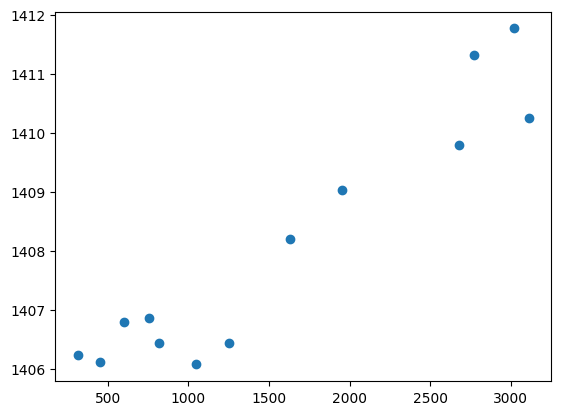

In [2222]:
ssres = np.sum((Y_test - Y_pred_svr) ** 2)
sstot = np.sum((Y_test - np.mean(Y_test)) ** 2)
r2_svr = 1 - (ssres / sstot)

print("SVR R2:", r2_svr) 
plt.scatter(Y_test, Y_pred_svr)

In [2223]:
Y

array([2677.5009964 , 3109.49720409,  314.21456783,  916.71030998,
       2932.22945991, 1954.74762774, 1448.90859453,  944.75720702,
        756.7881705 ,  602.61746809,  642.75616868, 1045.25400824,
        452.95624789, 1251.62680871, 1365.58534223,  817.68852068,
       2773.87527078, 1185.02265838, 3316.5648018 , 3546.99871003,
       3757.38136994,  457.05361614, 3017.2853976 , 1629.74732512,
       3588.77295797])

In [2224]:
Y_test

array([ 756.7881705 , 2773.87527078, 2677.5009964 , 1629.74732512,
       1045.25400824,  602.61746809, 1251.62680871, 3109.49720409,
       3017.2853976 , 1954.74762774,  314.21456783,  452.95624789,
        817.68852068])

In [2225]:
Y_pred_svr

array([1406.85363536, 1411.31727208, 1409.79659901, 1408.19412177,
       1406.06941183, 1406.7846769 , 1406.42704439, 1410.25694055,
       1411.76886951, 1409.03552192, 1406.23736173, 1406.11524284,
       1406.44112324])

## Test about bases

We will try to replicate the study in Jervis et al, 2018, where 12 RBS positions are exchanged for GPPS and limS. There are in total $4^12 = 16777216$ combinations per gene. In the study, only some combinations were allowed, in total 144 possibilities. 

We will the following:

1. Try to build a learning model by testing a 64 library.
2. See how this will scale to a larger case.

In [2226]:
allowed = {'R': ['A','G'], 'V': ['A','C','G'], 'S': ['C','G']}
variants1 = 'RRVRR'
variants2 = 'RSVRS'
variants = variants1 + variants2
possible = []
possible1 = []
possible2 = []
for i in range(len(variants)):
    possible.append(allowed[variants[i]])
for i in range(len(variants1)):
    possible1.append(allowed[variants1[i]])
for i in range(len(variants2)):
    possible2.append(allowed[variants2[i]])

from itertools import product
combinations = list(product(*possible))
combinations1 = list(product(*possible1))
combinations2 = list(product(*possible2))


In [2227]:
def get_kmers(sequence, k=2):
    """
    Generate k-mers from a given sequence.
    
    Parameters:
    sequence (str): The input sequence.
    k (int): Length of the k-mers to generate.
    
    Returns:
    list: List of k-mers.
    """
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

k1 = set()
k2 = set()
k3 = set()

for i in range(len(combinations)):
    seq = ''.join(combinations[i])
    kmers1 = get_kmers(seq, k=1)
    k1 |= set(kmers1)
    kmers2 = get_kmers(seq, k=2)
    k2 |= set(kmers2)
    kmers3 = get_kmers(seq, k=3)
    k3 |= set(kmers3)

rbs1 = {}
for k in k1:
    rbs1[k] = np.random.uniform()
rbs2 = {}
for k in k2:
    rbs2[k] = np.random.uniform()
rbs3 = {}
for k in k3:
    rbs3[k] = np.random.uniform()

rbss1 = {}
for i in range(len(combinations1)):
    seq = ''.join(combinations1[i])
    rbss1[combinations1[i]] = 0
    kmers1 = get_kmers(seq, k=1)
    for j in kmers1:
        rbss1[combinations1[i]] += rbs1[j]
    kmers2 = get_kmers(seq, k=2)
    for j in kmers2:
        rbss1[combinations1[i]] += rbs2[j]
    kmers3 = get_kmers(seq, k=3)
    for j in kmers3:
        rbss1[combinations1[i]] += rbs3[j]

rbss2 = {}
for i in range(len(combinations2)):
    seq = ''.join(combinations2[i])
    rbss2[combinations2[i]] = 0
    kmers1 = get_kmers(seq, k=1)
    for j in kmers1:
        rbss2[combinations2[i]] += rbs1[j]
    kmers2 = get_kmers(seq, k=2)
    for j in kmers2:
        rbss2[combinations2[i]] += rbs2[j]
    kmers3 = get_kmers(seq, k=3)
    for j in kmers3:
        rbss2[combinations2[i]] += rbs3[j]


print("RBS strengths for each combination:")
for comb, strength in rbss1.items():
    print(f"{comb}: {strength}")

RBS strengths for each combination:
('A', 'A', 'A', 'A', 'A'): 6.760394894626222
('A', 'A', 'A', 'A', 'G'): 6.427116463022238
('A', 'A', 'A', 'G', 'A'): 6.493996503746374
('A', 'A', 'A', 'G', 'G'): 5.897044457002267
('A', 'A', 'C', 'A', 'A'): 6.167459243285704
('A', 'A', 'C', 'A', 'G'): 5.63720227965389
('A', 'A', 'C', 'G', 'A'): 5.440013829955032
('A', 'A', 'C', 'G', 'G'): 5.315769908067126
('A', 'A', 'G', 'A', 'A'): 6.232697793595253
('A', 'A', 'G', 'A', 'G'): 5.824646678592398
('A', 'A', 'G', 'G', 'A'): 6.186633764230258
('A', 'A', 'G', 'G', 'G'): 4.879036616445465
('A', 'G', 'A', 'A', 'A'): 6.036605566845536
('A', 'G', 'A', 'A', 'G'): 5.703327135241552
('A', 'G', 'A', 'G', 'A'): 5.6954344925668146
('A', 'G', 'A', 'G', 'G'): 5.098482445822707
('A', 'G', 'C', 'A', 'A'): 5.604756944712063
('A', 'G', 'C', 'A', 'G'): 5.074499981080251
('A', 'G', 'C', 'G', 'A'): 5.225993161667688
('A', 'G', 'C', 'G', 'G'): 5.101749239779782
('A', 'G', 'G', 'A', 'A'): 5.729242827329419
('A', 'G', 'G', 'A'

In [2228]:
l1 = list(rbss1.keys())
l2 = list(rbss2.keys())

rkeys1 = np.random.choice(np.arange(len(l1)), 32, replace=False)
rkeys2 = np.random.choice(np.arange(len(l2)), 32, replace=False)

lib1 = [l1[i] for i in rkeys1]
lib2 = [l2[i] for i in rkeys2]


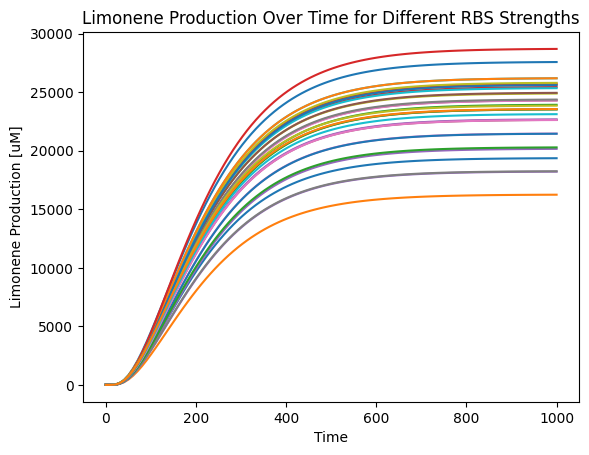

In [2229]:


# This code simulates the limonene production dynamics based on RBS strengths, generates combinations of RBS sequences, and evaluates the model using different regression techniques.

y0 = [0, 0, 0, 0, 0, 0]  # Initial conditions for the system
time = np.linspace(0, 1000, 100)  # Time points for simulation

X = [] # Placeholder for RBS strengths combinations
Y = [] # Placeholder for results

libsize = 32
mylib = []

for i in np.arange(libsize): #[0.1, 0.5, 1.0]:  # Example RBS strengths for gene 1
        r1 = l1[np.random.choice(np.arange(len(l1)))]
        r2 = l2[np.random.choice(np.arange(len(l2)))]
        rbs1_strength = rbss1[r1]+0*np.random.normal()  # RBS strength for first gene
        rbs2_strength = rbss2[r2]+0*np.random.normal()
        mylib.append((r1,r2))
        result = odeint(limonene_production_dynamics, y0, time, args=(rbs1_strength, rbs2_strength))
        X.append([rbs1_strength, rbs2_strength])  # Store the RBS strengths
        Y.append(result[-1, -1]+0*np.random.normal())  # Store the final limonene production value
        plt.plot(time, result[:, -1], label=f'RBS1: {rbs1_strength}, RBS2: {rbs2_strength}')


plt.xlabel('Time')
plt.ylabel('Limonene Production [uM]')
plt.title('Limonene Production Over Time for Different RBS Strengths')
#plt.legend()
plt.show()

### Build a training set based on the nucleotide type at each RBS position

In [2230]:
# Create dummy input for the training set
Xd = []
vn = ['A','C','G']
for construct in mylib:
    v = []
    for pos in construct:
        for n in pos:         
            for i in np.arange(len(vn)): 
                if n == vn[i]:
                    v.append(1)
                else:
                    v.append(0)
    Xd.append(v)


In [2231]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
scaler.fit(Xd)
Xd = scaler.transform(Xd)

# Convert Y to numpy array if it's a list
Y = np.array(Y)

# Reshape Y if needed
Y = Y.reshape(-1)

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(Xd, Y, test_size=0.50)

# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
X_test1 = X_train
Y_test1 = Y_train
Y_pred_lin = lin_reg.predict(X_test1)
print("Linear Regression MSE:", mean_squared_error(Y_test1, Y_pred_lin))
print("Linear Regression R2:", r2_score(Y_test1, Y_pred_lin))

# Support Vector Regression
svr = SVR(kernel='sigmoid', degree=2, C=1.0, epsilon=0.1)
svr.fit(X_train, Y_train)
Y_pred_svr = svr.predict(X_test1)
print("SVR MSE:", mean_squared_error(Y_test1, Y_pred_svr))
print("SVR R2:", r2_score(Y_test1, Y_pred_svr))

pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, Y_train)
Y_pred_pls = pls2.predict(X_test1)
print("PLS MSE:", mean_squared_error(Y_test1, Y_pred_pls))
print("PLS R2:", r2_score(Y_test1, Y_pred_pls))

kernel = 1 * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, Y_train)
mean_prediction, std_prediction = gaussian_process.predict(X_test1, return_std=True)
print("Gaussian Process MSE:", mean_squared_error(Y_test1, mean_prediction))
print("Gaussian Process R2:", r2_score(Y_test1, mean_prediction))

Linear Regression MSE: 1230593.4021929712
Linear Regression R2: 0.8418673848514799
SVR MSE: 8172802.116815127
SVR R2: -0.050214123950483636
PLS MSE: 2162681.5771250045
PLS R2: 0.7220930220210342
Gaussian Process MSE: 1.6957202557337067e-22
Gaussian Process R2: 1.0


/Users/pablo/opt/anaconda3/envs/biosai/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


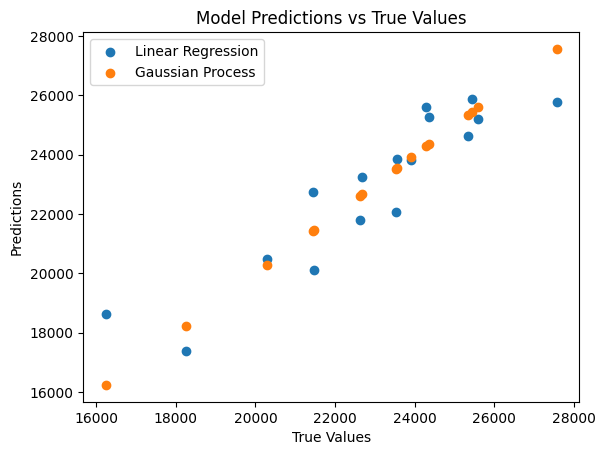

In [2232]:
plt.scatter(Y_test1, Y_pred_lin)
plt.scatter(Y_test1, mean_prediction)
plt.legend(['Linear Regression', 'Gaussian Process'])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Model Predictions vs True Values')
plt.show()

In [2233]:
len(combinations1)

48

In [2234]:
mylib

[(('A', 'A', 'G', 'G', 'A'), ('G', 'G', 'G', 'A', 'C')),
 (('A', 'A', 'G', 'G', 'G'), ('A', 'G', 'G', 'G', 'G')),
 (('G', 'G', 'C', 'A', 'G'), ('G', 'C', 'C', 'G', 'G')),
 (('G', 'G', 'A', 'A', 'G'), ('A', 'C', 'C', 'G', 'G')),
 (('G', 'G', 'C', 'G', 'A'), ('G', 'C', 'A', 'G', 'G')),
 (('G', 'G', 'A', 'G', 'A'), ('G', 'C', 'A', 'A', 'C')),
 (('G', 'G', 'A', 'G', 'G'), ('A', 'C', 'G', 'G', 'C')),
 (('A', 'G', 'A', 'G', 'A'), ('G', 'C', 'A', 'A', 'G')),
 (('G', 'A', 'A', 'A', 'A'), ('A', 'C', 'A', 'G', 'C')),
 (('A', 'A', 'A', 'G', 'G'), ('A', 'G', 'A', 'A', 'C')),
 (('A', 'A', 'G', 'A', 'G'), ('G', 'C', 'C', 'G', 'C')),
 (('G', 'G', 'G', 'A', 'G'), ('A', 'C', 'A', 'A', 'C')),
 (('G', 'A', 'C', 'G', 'G'), ('A', 'G', 'G', 'A', 'G')),
 (('G', 'G', 'A', 'A', 'G'), ('A', 'G', 'A', 'G', 'C')),
 (('A', 'G', 'C', 'G', 'A'), ('G', 'C', 'G', 'G', 'G')),
 (('A', 'G', 'C', 'G', 'A'), ('A', 'G', 'A', 'G', 'G')),
 (('G', 'A', 'C', 'G', 'G'), ('G', 'C', 'C', 'A', 'C')),
 (('A', 'G', 'A', 'G', 'A'), ('